In [33]:
#imports
import os
from six.moves import urllib
import pandas as pd
import numpy as np 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from statsmodels import robust

In [34]:
DOWNLOAD_ROOT = "http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening"
CREDIT_DATA_URL = DOWNLOAD_ROOT + "/crx.data"
CREDIT_DATA_PATH = "datasets/credit-screening"

In [35]:
# fetch data from its origin
def fetch_credit_crad_data(credit_data_url=CREDIT_DATA_URL, credit_path=CREDIT_DATA_PATH):
    if not os.path.isdir(credit_path):
        os.makedirs(credit_path)
    credit_data_path = os.path.join(credit_path, "crx.data")
    urllib.request.urlretrieve(credit_data_url, credit_data_path)

fetch_credit_crad_data()

In [36]:
def load_credit_card_data(credit_data_path=CREDIT_DATA_PATH):
    csv_path=os.path.join(credit_data_path, "crx.data")
    pd.set_option('display.max_columns', None)
    col_names = ["Gender","Age","Debt","Married","BankCustomer","EducationLevel","Ethnicity","YearsEmployed","PriorDefault","Employed","CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income" , "ApprovalStatus"]
    return pd.read_csv(csv_path, header=None, names=col_names)

data = load_credit_card_data()
dataset = dataset.copy()
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [37]:
#replace some values so it makes sense
dataset = dataset.replace("?", np.nan).replace('+', 1).replace('-', 0)

#drop all row which have at least one null value
dataset_dropNa = dataset.dropna()
dataset_dropNa.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [41]:
# after drop rows with at least one Na value, the dataset now has 
dataset_dropNa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
Gender            653 non-null object
Age               653 non-null object
Debt              653 non-null float64
Married           653 non-null object
BankCustomer      653 non-null object
EducationLevel    653 non-null object
Ethnicity         653 non-null object
YearsEmployed     653 non-null float64
PriorDefault      653 non-null object
Employed          653 non-null object
CreditScore       653 non-null int64
DriversLicense    653 non-null object
Citizen           653 non-null object
ZipCode           653 non-null object
Income            653 non-null int64
ApprovalStatus    653 non-null int64
dtypes: float64(2), int64(3), object(11)
memory usage: 86.7+ KB


In [25]:
# if want to keep the null values inside the dataset, then use this:

#fill na value with median for the numeric values
dataset_fillNa = dataset.fillna(dataset.mean())

#replace missing object values with the most freequent value
for col in dataset_fillNa:
    if dataset_fillNa[col].dtypes == 'object':
        dataset_fillNa = dataset_fillNa.fillna(dataset_fillNa[col].value_counts().index[0])

In [42]:
dataset_dropNa['ApprovalStatus'].value_counts()

0    357
1    296
Name: ApprovalStatus, dtype: int64

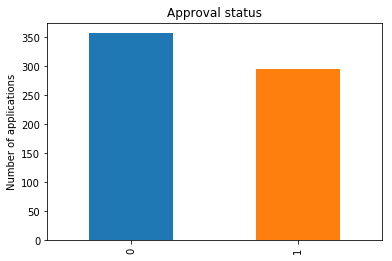

In [43]:
CountStatus = pd.value_counts(dataset_dropNa['ApprovalStatus'].values, sort=False)
plt.ylabel('Number of applications')
plt.title('Approval status')
CountStatus.plot.bar()

In [44]:
dataset_dropNa.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus      int64
dtype: object

In [47]:
# convert dataset_dropNa cat attributes to numeric
le = preprocessing.LabelEncoder()

for col in dataset_dropNa:
    if dataset_dropNa[col].dtypes == 'object':
        dataset_dropNa[col]=le.fit_transform(dataset_dropNa[col])
dataset_dropNa.dtypes

C:\Users\LeiX\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Gender              int32
Age                 int32
Debt              float64
Married             int32
BankCustomer        int32
EducationLevel      int32
Ethnicity           int32
YearsEmployed     float64
PriorDefault        int32
Employed            int32
CreditScore         int64
DriversLicense      int32
Citizen             int32
ZipCode             int32
Income              int64
ApprovalStatus      int64
dtype: object

In [48]:
dataset_dropNa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
Gender            653 non-null int32
Age               653 non-null int32
Debt              653 non-null float64
Married           653 non-null int32
BankCustomer      653 non-null int32
EducationLevel    653 non-null int32
Ethnicity         653 non-null int32
YearsEmployed     653 non-null float64
PriorDefault      653 non-null int32
Employed          653 non-null int32
CreditScore       653 non-null int64
DriversLicense    653 non-null int32
Citizen           653 non-null int32
ZipCode           653 non-null int32
Income            653 non-null int64
ApprovalStatus    653 non-null int64
dtypes: float64(2), int32(11), int64(3)
memory usage: 58.7 KB
